In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [39]:
df=pd.read_csv("../Dummy Data/final_08-19.csv")
df20=pd.read_csv("../Dummy Data/final_2020.csv")
df.head()
df[pd.isnull(df['winner'])]
df = df.dropna()

#df['winner'].fillna('Draw', inplace=True)


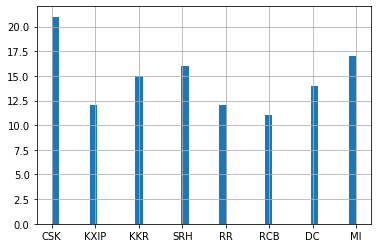

In [40]:
df['winner'].hist(bins=40)


#df['winner']=(((df['winner'])==(df['team A'])).astype(int))


In [41]:
df['team A'].value_counts()


MI      19
SRH     16
KKR     15
DC      15
KXIP    14
RCB     14
RR      13
CSK     12
Name: team A, dtype: int64

In [42]:
df.Toss_Winner[df.Toss_Winner == df['team A']] = 0
df.Toss_Winner[df.Toss_Winner == df['team B']] = 1
df.winner[df.winner == df['team A']] = 0
df.winner[df.winner == df['team B']] = 1
df

C:\Users\krithikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\krithikha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,...,result,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,umpire3,venue
636,MI,CSK,1,590,648,475,667,0.564706,0.636364,40,...,normal,field,0,0,1,DJ Bravo,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary,Wankhede Stadium
637,DC,KXIP,1,497,572,696,446,0.458333,0.411765,48,...,normal,field,0,0,6,KL Rahul,Rod Tucker,K Ananthapadmanabhan,Nitin Menon,"Punjab Cricket Association IS Bindra Stadium, ..."
638,RCB,KKR,1,722,497,611,657,0.500000,0.564103,57,...,normal,field,0,0,4,SP Narine,C ShamshuDCin,A.D Deshmukh,S Ravi,Eden Gardens
639,RR,SRH,1,549,621,637,690,0.539683,0.485714,51,...,normal,field,0,0,9,S Dhawan,Nigel Llong,Vineet Kulkarni,O Nandan,"Rajiv Gandhi International Stadium, Uppal"
640,KKR,CSK,1,497,648,657,667,0.564103,0.636364,65,...,normal,field,0,0,5,SW Billings,Anil Chaudhary,Chris Gaffaney,A Nanda Kishore,"MA Chidambaram Stadium, Chepauk"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,CSK,KXIP,1,658,656,700,446,0.649351,0.426667,44,...,normal,field,0,0,6,KL Rahul,KN Ananthapadmanabhan,C ShamshuDCin,Bruce Oxenford,IS Bindra Stadium
751,KKR,MI,1,589,616,406,759,0.563218,0.555556,51,...,normal,field,0,0,9,HH Pandya,Nanda Kishore,O Nandan,S Ravi,Wankhede Stadium
752,CSK,MI,0,658,616,700,759,0.649351,0.555556,33,...,normal,bat,0,0,6,AS Yadav,Nigel Llong,Nitin Menon,Ian Gould,M. A. Chidambaram Stadium
754,DC,CSK,1,537,658,810,700,0.000000,0.649351,42,...,normal,field,0,0,6,F du Plessis,Sundaram Ravi,Bruce Oxenford,Chettithody ShamshuDCin,ACA-VDECA Stadium


In [43]:
encode = {'team A': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DEC':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PWI':13},
          'team B': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DEC':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PWI':13},
         'result':{'normal':1,'tie':10,'no result':0},
         'toss_decision':{'bat':1,'field':2},
         'Team A Ground':{'home':1,'away':0},
         'Team B Ground':{'home':1,'away':0},

         }
df.replace(encode, inplace=True)
df.head()


,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,...,result,toss_decision,dl_applied,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,umpire3,venue
636,1,5,1,590,648,475,667,0.564706,0.636364,40,...,1,2,0,0,1,DJ Bravo,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary,Wankhede Stadium
637,4,9,1,497,572,696,446,0.458333,0.411765,48,...,1,2,0,0,6,KL Rahul,Rod Tucker,K Ananthapadmanabhan,Nitin Menon,"Punjab Cricket Association IS Bindra Stadium, ..."
638,3,2,1,722,497,611,657,0.500000,0.564103,57,...,1,2,0,0,4,SP Narine,C ShamshuDCin,A.D Deshmukh,S Ravi,Eden Gardens
639,6,10,1,549,621,637,690,0.539683,0.485714,51,...,1,2,0,0,9,S Dhawan,Nigel Llong,Vineet Kulkarni,O Nandan,"Rajiv Gandhi International Stadium, Uppal"
640,2,5,1,497,648,657,667,0.564103,0.636364,65,...,1,2,0,0,5,SW Billings,Anil Chaudhary,Chris Gaffaney,A Nanda Kishore,"MA Chidambaram Stadium, Chepauk"


In [44]:
df[pd.isnull(df['venue'])]
df.dtypes

team A                                  object
team B                                  object
Toss_Winner                             object
Top Batsmen Points(Team A)               int64
Top Batsmen Points(Team B)               int64
Top Baller Points(Team A)                int64
Top Baller Points(Team B)                int64
Match Won after winning Toss Team A    float64
Match Won after winning Toss Team B    float64
runs in pp team a                        int64
runs in pp team b                        int64
Run Rate(Team A)                       float64
Run Rate(Team B)                       float64
Most Value Player Points(Team A)       float64
Most Value Player Points(Team B)       float64
Win ratio (Team A)                     float64
Win ratio (Team B)                     float64
Team A Ground                            int64
Team B Ground                            int64
winner                                  object
id                                       int64
result       

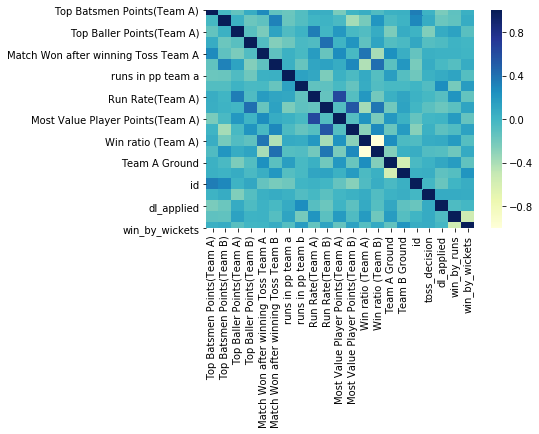

In [45]:
#finding which feature has most impact on price
import seaborn as sns
imp=df.corr()
sns.heatmap(imp,cmap="YlGnBu")


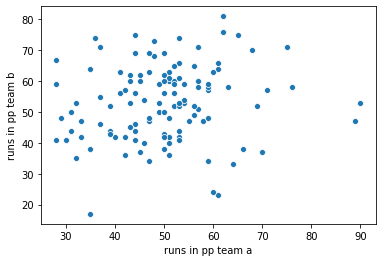

In [46]:
sns.scatterplot(df["runs in pp team a"], df["runs in pp team b"])


In [47]:
#df['Toss_Winner']=df['Toss_Winner'].asType(int)
r1=pd.Series(range(19))
r2=pd.Series(range(20,26))
f=r1.append(r2)
x=df.iloc[:,f]
y=df.iloc[:,19]
y

636    1
637    1
638    1
639    1
640    1
      ..
750    1
751    1
752    1
754    1
755    0
Name: winner, Length: 118, dtype: object

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=3)
print((x_test.shape))

print(y_train.shape)



(25, 25)
(93,)


In [77]:
y_train = y_train.astype('int')
#y_train.value_counts()
y_test = y_test.astype('int')


In [82]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [83]:
y_pred = knn.predict(x_test)
#show first 5 model predictions on the test data
knn.predict(x_test)[0:5]
print("KNN score:",knn.score(x_test,y_test))


KNN score: 0.6


In [84]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test,y_pred)
print(score)
mean_sqerr = mean_squared_error(y_test,y_pred)
print(mean_sqerr)

-0.7361111111111112
0.4


In [87]:
from sklearn import metrics
#print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F_1 Score:", metrics.f1_score(y_test, y_pred))
print("ROC AUC", metrics.roc_auc_score(y_test, y_pred))

Test Accuracy: 0.6
F_1 Score: 0.6875
ROC AUC 0.5659722222222222
